In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import codecs
import glob
import logging
import multiprocessing
import os
import pprint
import re

In [3]:
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [6]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /home/jalaj/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jalaj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
book_filenames = sorted(glob.glob("/home/jalaj/PycharmProjects/NLPython/NLPython/ch6/gameofthrones2vec/data/*.txt"))

In [8]:
print("Found books:")
book_filenames

Found books:


['/home/jalaj/PycharmProjects/NLPython/NLPython/ch6/gameofthrones2vec/data/got1.txt',
 '/home/jalaj/PycharmProjects/NLPython/NLPython/ch6/gameofthrones2vec/data/got2.txt',
 '/home/jalaj/PycharmProjects/NLPython/NLPython/ch6/gameofthrones2vec/data/got3.txt',
 '/home/jalaj/PycharmProjects/NLPython/NLPython/ch6/gameofthrones2vec/data/got4.txt',
 '/home/jalaj/PycharmProjects/NLPython/NLPython/ch6/gameofthrones2vec/data/got5.txt']

In [9]:
corpus_raw = u""
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading '/home/jalaj/PycharmProjects/NLPython/NLPython/ch6/gameofthrones2vec/data/got1.txt'...
Corpus is now 1770659 characters long

Reading '/home/jalaj/PycharmProjects/NLPython/NLPython/ch6/gameofthrones2vec/data/got2.txt'...
Corpus is now 4071041 characters long

Reading '/home/jalaj/PycharmProjects/NLPython/NLPython/ch6/gameofthrones2vec/data/got3.txt'...
Corpus is now 6391405 characters long

Reading '/home/jalaj/PycharmProjects/NLPython/NLPython/ch6/gameofthrones2vec/data/got4.txt'...
Corpus is now 8107945 characters long

Reading '/home/jalaj/PycharmProjects/NLPython/NLPython/ch6/gameofthrones2vec/data/got5.txt'...
Corpus is now 9719485 characters long



In [10]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [11]:
raw_sentences = tokenizer.tokenize(corpus_raw)

In [12]:
#convert into a list of words
#rtemove unnnecessary,, split into words, no hyphens
#list of words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [13]:
#sentence where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [14]:
print(raw_sentences[5])
print(sentence_to_wordlist(raw_sentences[5]))

Heraldic crest by Virginia Norey.
[u'Heraldic', u'crest', u'by', u'Virginia', u'Norey']


In [15]:
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 1,818,103 tokens


In [16]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [17]:
thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [18]:
thrones2vec.build_vocab(sentences)

2017-06-11 19:15:16,837 : INFO : collecting all words and their counts
2017-06-11 19:15:16,838 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-06-11 19:15:16,861 : INFO : PROGRESS: at sentence #10000, processed 140984 words, keeping 10280 word types
2017-06-11 19:15:16,883 : INFO : PROGRESS: at sentence #20000, processed 279730 words, keeping 13558 word types
2017-06-11 19:15:16,905 : INFO : PROGRESS: at sentence #30000, processed 420336 words, keeping 16598 word types
2017-06-11 19:15:16,928 : INFO : PROGRESS: at sentence #40000, processed 556581 words, keeping 18324 word types
2017-06-11 19:15:16,950 : INFO : PROGRESS: at sentence #50000, processed 686247 words, keeping 19714 word types
2017-06-11 19:15:16,972 : INFO : PROGRESS: at sentence #60000, processed 828497 words, keeping 21672 word types
2017-06-11 19:15:16,996 : INFO : PROGRESS: at sentence #70000, processed 973830 words, keeping 23093 word types
2017-06-11 19:15:17,019 : INFO : PROGRESS: at 

In [19]:
print("Word2Vec vocabulary length:", len(thrones2vec.wv.vocab))

Word2Vec vocabulary length: 17277


In [21]:
thrones2vec.train(sentences)

2017-06-11 19:15:31,390 : INFO : training model with 4 workers on 17277 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2017-06-11 19:15:31,390 : INFO : expecting 128868 sentences, matching count from corpus used for vocabulary survey
2017-06-11 19:15:32,394 : INFO : PROGRESS: at 4.64% examples, 322887 words/s, in_qsize 8, out_qsize 0
2017-06-11 19:15:33,400 : INFO : PROGRESS: at 10.08% examples, 345888 words/s, in_qsize 8, out_qsize 0
2017-06-11 19:15:34,405 : INFO : PROGRESS: at 15.25% examples, 350883 words/s, in_qsize 8, out_qsize 0
2017-06-11 19:15:35,410 : INFO : PROGRESS: at 20.21% examples, 352961 words/s, in_qsize 8, out_qsize 0
2017-06-11 19:15:36,437 : INFO : PROGRESS: at 25.52% examples, 354611 words/s, in_qsize 8, out_qsize 0
2017-06-11 19:15:37,450 : INFO : PROGRESS: at 31.02% examples, 357786 words/s, in_qsize 8, out_qsize 0
2017-06-11 19:15:38,476 : INFO : PROGRESS: at 36.56% examples, 359290 words/s, in_qsize 8, out_qsize 0
2017-06-11 19:1

7021557

In [22]:
if not os.path.exists("trained"):
    os.makedirs("trained")

In [23]:
thrones2vec.save(os.path.join("trained", "thrones2vec.w2v"))

2017-06-11 19:21:15,503 : INFO : saving Word2Vec object under trained/thrones2vec.w2v, separately None
2017-06-11 19:21:15,503 : INFO : not storing attribute syn0norm
2017-06-11 19:21:15,504 : INFO : not storing attribute cum_table
2017-06-11 19:21:15,594 : INFO : saved trained/thrones2vec.w2v


In [24]:
thrones2vec = w2v.Word2Vec.load(os.path.join("trained", "thrones2vec.w2v"))

2017-06-11 19:21:17,102 : INFO : loading Word2Vec object from trained/thrones2vec.w2v
2017-06-11 19:21:17,201 : INFO : loading wv recursively from trained/thrones2vec.w2v.wv.* with mmap=None
2017-06-11 19:21:17,201 : INFO : setting ignored attribute syn0norm to None
2017-06-11 19:21:17,202 : INFO : setting ignored attribute cum_table to None
2017-06-11 19:21:17,202 : INFO : loaded trained/thrones2vec.w2v


In [25]:
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [26]:
all_word_vectors_matrix = thrones2vec.wv.syn0

In [27]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [28]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.vocab[word].index])
            for word in thrones2vec.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

2017-06-11 19:28:49,260 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,269 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,273 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,276 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,279 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,281 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,284 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,285 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,316 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,317 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,317 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,317 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,318 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,318 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,318 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,319 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,344 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,345 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,345 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,345 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,346 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,346 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,347 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,347 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,375 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,375 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,376 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,376 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,377 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,377 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,378 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,378 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,405 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,405 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,405 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,406 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,406 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,407 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,407 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,408 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,435 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,435 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,436 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,437 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,437 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,438 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,438 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,439 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,465 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,467 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,468 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,469 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,470 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,470 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,471 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,471 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,504 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,505 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,505 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,506 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,506 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,507 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,507 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,507 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,534 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,535 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,535 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,536 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,536 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,537 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,537 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,537 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,566 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,567 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,567 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,568 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,568 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,573 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,574 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,574 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,609 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,609 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,610 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,611 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,611 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,612 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,614 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,616 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,644 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,644 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,645 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,646 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,647 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,647 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,648 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,649 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,677 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,677 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,678 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,678 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,678 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,679 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,679 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,680 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,711 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,712 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,712 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,713 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,713 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,713 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,714 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,714 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,757 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,758 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,758 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,759 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,761 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,761 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,762 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,762 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,800 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,800 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,800 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,801 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,801 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,802 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,802 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,802 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,837 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,838 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,838 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,838 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,839 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,839 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,840 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,840 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,869 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,870 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,871 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,871 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,872 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,872 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,872 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,873 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,903 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,904 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,904 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,904 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,905 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,905 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,906 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,906 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,935 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,935 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,936 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,936 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,937 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,937 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,937 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,938 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,966 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,967 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,967 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,968 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,968 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,969 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,969 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,969 : WARNING : direct access to vocab wil

2017-06-11 19:28:49,999 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:49,999 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,000 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,001 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,001 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,001 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,002 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,002 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,038 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,038 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,039 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,039 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,040 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,040 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,041 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,042 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,071 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,081 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,081 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,082 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,082 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,083 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,083 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,084 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,114 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,115 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,115 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,116 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,116 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,117 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,117 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,117 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,153 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,154 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,155 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,155 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,156 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,156 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,157 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,157 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,203 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,203 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,204 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,204 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,204 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,205 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,205 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,206 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,237 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,237 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,238 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,238 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,239 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,239 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,240 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,240 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,278 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,278 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,279 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,279 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,280 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,280 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,280 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,281 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,321 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,321 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,322 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,322 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,323 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,323 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,324 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,324 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,352 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,352 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,353 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,353 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,353 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,354 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,355 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,355 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,391 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,391 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,392 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,392 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,393 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,394 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,394 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,394 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,426 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,427 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,428 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,428 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,428 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,429 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,429 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,430 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,458 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,458 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,459 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,461 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,461 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,461 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,462 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,462 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,489 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,490 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,490 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,491 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,491 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,492 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,492 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,493 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,520 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,521 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,521 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,522 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,522 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,522 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,523 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,523 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,554 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,555 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,555 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,556 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,556 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,556 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,564 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,564 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,592 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,593 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,593 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,594 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,594 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,594 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,597 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,597 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,630 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,631 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,631 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,632 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,632 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,633 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,633 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,634 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,669 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,669 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,670 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,670 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,671 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,671 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,672 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,672 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,698 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,699 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,699 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,700 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,700 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,700 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,701 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,701 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,739 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,739 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,740 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,741 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,741 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,742 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,742 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,743 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,777 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,777 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,778 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,778 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,779 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,779 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,780 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,780 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,812 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,813 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,813 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,814 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,814 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,814 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,815 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,815 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,851 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,851 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,851 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,852 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,852 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,853 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,853 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,854 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,884 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,884 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,885 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,885 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,886 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,886 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,886 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,887 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,916 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,917 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,917 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,917 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,918 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,918 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,919 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,919 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,943 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,943 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,943 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,944 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,944 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,945 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,945 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,946 : WARNING : direct access to vocab wil

2017-06-11 19:28:50,977 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,978 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,978 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,979 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,979 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,979 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,980 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:50,980 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,117 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,118 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,118 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,118 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,119 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,120 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,120 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,121 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,150 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,150 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,150 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,151 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,151 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,152 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,152 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,152 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,199 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,199 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,199 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,200 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,200 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,201 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,201 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,201 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,227 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,228 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,228 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,228 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,229 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,229 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,230 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,231 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,255 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,255 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,256 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,256 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,263 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,264 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,265 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,265 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,291 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,292 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,293 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,294 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,295 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,295 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,296 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,296 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,319 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,320 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,320 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,321 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,321 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,321 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,322 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,322 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,342 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,342 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,342 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,343 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,343 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,343 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,344 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,344 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,364 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,364 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,365 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,365 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,366 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,366 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,366 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,367 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,386 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,386 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,386 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,387 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,387 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,387 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,388 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,388 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,407 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,408 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,408 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,409 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,409 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,409 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,410 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,410 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,430 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,431 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,431 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,431 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,432 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,432 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,433 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,433 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,453 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,453 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,454 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,454 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,454 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,455 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,456 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,456 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,476 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,476 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,477 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,477 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,477 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,478 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,478 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,478 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,499 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,499 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,500 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,500 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,501 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,501 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,501 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,502 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,522 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,523 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,523 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,524 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,524 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,524 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,525 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,525 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,552 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,553 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,553 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,553 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,554 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,554 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,554 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,555 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,585 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,585 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,585 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,586 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,586 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,587 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,587 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,587 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,619 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,620 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,620 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,620 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,621 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,621 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,621 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,622 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,652 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,653 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,653 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,653 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,654 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,654 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,655 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,655 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,683 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,684 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,684 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,684 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,685 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,685 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,685 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,686 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,713 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,713 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,714 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,714 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,714 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,715 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,715 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,716 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,739 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,739 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,740 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,740 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,741 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,741 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,741 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,742 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,791 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,791 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,792 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,792 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,793 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,793 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,794 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,794 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,821 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,822 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,822 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,823 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,823 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,824 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,824 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,824 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,856 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,856 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,857 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,857 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,858 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,858 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,858 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,859 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,890 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,890 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,891 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,891 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,891 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,892 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,892 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,893 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,919 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,919 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,920 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,920 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,921 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,921 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,921 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,922 : WARNING : direct access to vocab wil

2017-06-11 19:28:52,955 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,956 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,956 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,957 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,957 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,958 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,958 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:52,958 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,005 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,005 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,006 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,006 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,007 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,007 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,008 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,008 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,037 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,037 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,037 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,038 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,038 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,039 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,040 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,041 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,072 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,072 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,073 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,073 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,074 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,074 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,075 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,075 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,105 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,106 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,106 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,107 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,107 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,108 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,108 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,109 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,143 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,144 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,144 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,145 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,145 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,145 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,146 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,146 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,183 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,183 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,184 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,187 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,188 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,188 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,189 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,190 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,218 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,219 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,219 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,220 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,220 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,220 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,221 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,221 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,259 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,259 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,260 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,260 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,261 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,261 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,261 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,262 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,289 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,289 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,290 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,290 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,291 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,292 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,292 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,293 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,323 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,324 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,324 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,325 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,325 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,326 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,326 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,327 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,381 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,381 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,382 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,382 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,382 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,383 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,383 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,384 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,413 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,414 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,414 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,418 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,418 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,419 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,419 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,420 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,450 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,450 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,451 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,451 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,452 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,452 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,453 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,454 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,481 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,481 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,482 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,482 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,483 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,483 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,483 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,484 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,516 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,517 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,518 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,518 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,519 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,520 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,520 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,520 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,547 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,548 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,548 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,549 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,549 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,549 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,550 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,550 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,583 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,583 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,584 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,584 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,585 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,585 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,585 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,586 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,618 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,619 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,619 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,619 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,620 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,620 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,620 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,621 : WARNING : direct access to vocab wil

2017-06-11 19:28:53,665 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,665 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,666 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,666 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,667 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,667 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,667 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:53,668 : WARNING : direct access to vocab wil

2017-06-11 19:28:54,972 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,973 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,973 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,973 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,974 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,974 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,974 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,975 : WARNING : direct access to vocab wil

2017-06-11 19:28:54,995 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,996 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,996 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,996 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,997 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,997 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,997 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:54,998 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,018 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,018 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,019 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,019 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,019 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,020 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,020 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,020 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,042 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,042 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,042 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,043 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,043 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,044 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,044 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,044 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,065 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,065 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,065 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,066 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,066 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,067 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,067 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,067 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,087 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,087 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,088 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,088 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,088 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,089 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,089 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,089 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,109 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,109 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,110 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,110 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,110 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,111 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,111 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,111 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,131 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,131 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,132 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,132 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,132 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,133 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,133 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,134 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,153 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,153 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,154 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,154 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,155 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,155 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,155 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,156 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,175 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,176 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,176 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,177 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,177 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,177 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,178 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,178 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,199 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,199 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,199 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,200 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,200 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,200 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,201 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,201 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,220 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,221 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,221 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,222 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,222 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,222 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,223 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,223 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,243 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,243 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,243 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,244 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,244 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,244 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,245 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,245 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,265 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,265 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,265 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,266 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,266 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,266 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,267 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,267 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,287 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,287 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,287 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,288 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,288 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,288 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,289 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,289 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,309 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,309 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,309 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,310 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,310 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,310 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,311 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,311 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,331 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,332 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,332 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,332 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,333 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,333 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,333 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,334 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,353 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,353 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,354 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,354 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,354 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,355 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,355 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,356 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,375 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,376 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,376 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,376 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,377 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,377 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,377 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,378 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,398 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,398 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,399 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,399 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,399 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,400 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,400 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,400 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,421 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,421 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,421 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,422 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,422 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,422 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,423 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,423 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,443 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,443 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,444 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,444 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,444 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,445 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,445 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,446 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,465 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,465 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,466 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,466 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,466 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,467 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,467 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,467 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,487 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,488 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,488 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,489 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,489 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,489 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,490 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,490 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,510 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,510 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,510 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,511 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,511 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,511 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,512 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,512 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,533 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,533 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,534 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,534 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,534 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,535 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,535 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,535 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,555 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,556 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,556 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,556 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,557 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,557 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,558 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,558 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,578 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,578 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,579 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,579 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,579 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,580 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,580 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,580 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,601 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,601 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,602 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,602 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,602 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,603 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,603 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,603 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,623 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,624 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,624 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,625 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,625 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,625 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,626 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,626 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,646 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,646 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,647 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,647 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,647 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,648 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,648 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,649 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,668 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,668 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,669 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,669 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,669 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,670 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,670 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,671 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,690 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,691 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,691 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,692 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,692 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,692 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,693 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,693 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,713 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,713 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,713 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,714 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,714 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,714 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,715 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,715 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,735 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,735 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,736 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,736 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,737 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,737 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,737 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,738 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,758 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,758 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,758 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,759 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,759 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,759 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,760 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,760 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,780 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,781 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,781 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,781 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,782 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,782 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,782 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,783 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,803 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,803 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,803 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,804 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,804 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,804 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,805 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,805 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,825 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,825 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,826 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,826 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,826 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,827 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,827 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,827 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,848 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,848 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,848 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,849 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,849 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,849 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,850 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,850 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,870 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,870 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,871 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,871 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,872 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,872 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,872 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,873 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,893 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,893 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,894 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,894 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,894 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,895 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,895 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,895 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,916 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,916 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,917 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,917 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,917 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,918 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,918 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,918 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,939 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,939 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,939 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,940 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,940 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,940 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,941 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,941 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,961 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,961 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,962 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,962 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,963 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,963 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,963 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,964 : WARNING : direct access to vocab wil

2017-06-11 19:28:55,984 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,984 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,984 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,985 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,985 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,985 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,986 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:55,986 : WARNING : direct access to vocab wil

2017-06-11 19:28:56,006 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,006 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,007 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,007 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,007 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,008 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,008 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,009 : WARNING : direct access to vocab wil

2017-06-11 19:28:56,028 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,029 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,029 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,029 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,030 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,030 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,031 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,031 : WARNING : direct access to vocab wil

2017-06-11 19:28:56,051 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,051 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,051 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,052 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,052 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,052 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,053 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:56,053 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,422 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,423 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,423 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,424 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,425 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,425 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,426 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,426 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,458 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,459 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,459 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,460 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,460 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,461 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,461 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,461 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,489 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,489 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,490 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,490 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,491 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,492 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,492 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,493 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,519 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,520 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,520 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,520 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,521 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,521 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,522 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,522 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,548 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,548 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,549 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,549 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,549 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,550 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,550 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,550 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,585 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,585 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,586 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,586 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,586 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,587 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,587 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,588 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,629 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,629 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,630 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,630 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,631 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,631 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,632 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,632 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,664 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,665 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,665 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,666 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,666 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,666 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,667 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,667 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,698 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,698 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,698 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,699 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,699 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,702 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,702 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,703 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,734 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,735 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,735 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,736 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,736 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,736 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,737 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,737 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,767 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,767 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,768 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,768 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,768 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,769 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,769 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,769 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,802 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,802 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,802 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,803 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,803 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,804 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,804 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,804 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,845 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,845 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,846 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,846 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,846 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,848 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,849 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,850 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,878 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,878 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,879 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,881 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,882 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,882 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,882 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,883 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,911 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,911 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,912 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,912 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,913 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,913 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,913 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,914 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,955 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,956 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,956 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,957 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,957 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,958 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,958 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,959 : WARNING : direct access to vocab wil

2017-06-11 19:28:57,985 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,986 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,986 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,987 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,987 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,987 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,988 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:57,988 : WARNING : direct access to vocab wil

2017-06-11 19:28:58,015 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,016 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,016 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,016 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,017 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,017 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,017 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,020 : WARNING : direct access to vocab wil

2017-06-11 19:28:58,048 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,049 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,049 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,050 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,050 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,051 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,051 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,051 : WARNING : direct access to vocab wil

2017-06-11 19:28:58,083 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,084 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,084 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,085 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,085 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,085 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,086 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,086 : WARNING : direct access to vocab wil

2017-06-11 19:28:58,116 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,117 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,117 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,117 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,118 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,118 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,119 : WARNING : direct access to vocab will not be supported in future gensim releases, please use model.wv.vocab
2017-06-11 19:28:58,119 : WARNING : direct access to vocab wil

In [29]:
points.head(10)

,word,x,y
0,fawn,-2.162014,-1.810080
1,raining,2.246144,-1.463149
2,writings,-2.407672,-4.044370
3,Ysilla,0.171814,-2.094913
4,Rory,-0.896170,-3.414809
5,hordes,-2.071845,-5.008625
6,mustachio,1.774937,-3.018889
7,Greyjoy,-0.380601,1.465355
8,yellow,2.835113,-0.324548
9,four,-4.659260,-3.553765


In [30]:
sns.set_context("poster")

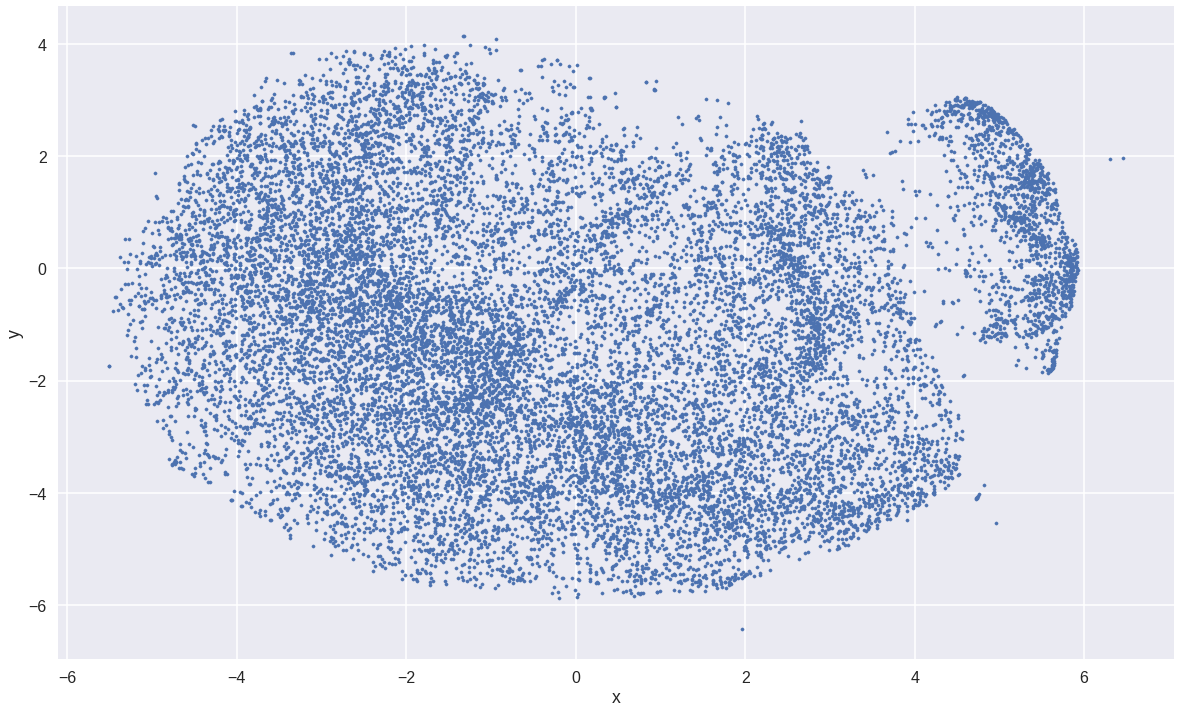

In [31]:
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [32]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

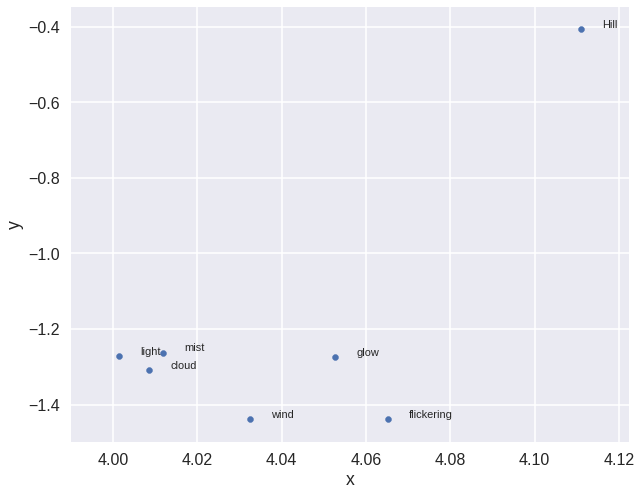

In [38]:
plot_region(x_bounds=(4.0, 4.2), y_bounds=(-1.5, -0.1))

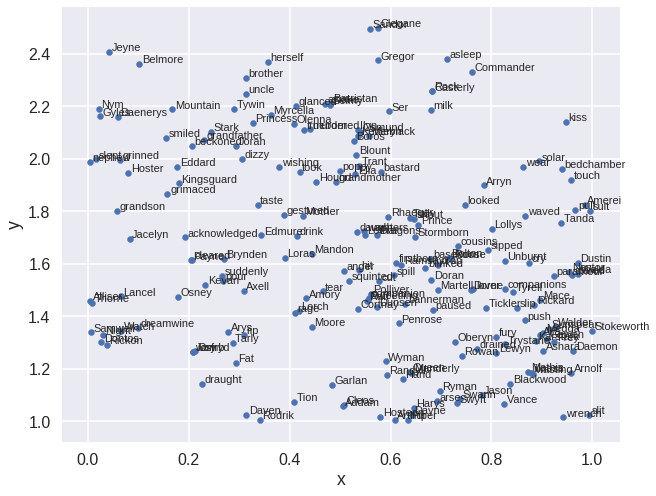

In [39]:
plot_region(x_bounds=(0, 1), y_bounds=(1, 2.5))

In [40]:
thrones2vec.wv.most_similar("Stark")

[(u'Eddard', 0.7325112819671631),
 (u'Winterfell', 0.6618878841400146),
 (u'Lyanna', 0.6476459503173828),
 (u'Rickard', 0.6393085718154907),
 (u'Karstark', 0.6334391832351685),
 (u'Robb', 0.6296013593673706),
 (u'executed', 0.6248215436935425),
 (u'beheaded', 0.614325225353241),
 (u'Tully', 0.6094435453414917),
 (u'Benjen', 0.607344925403595)]

In [41]:
thrones2vec.most_similar("Aerys")

[(u'Jaehaerys', 0.7924706339836121),
 (u'Mad', 0.7878335118293762),
 (u'Daeron', 0.7578268051147461),
 (u'reign', 0.7421121597290039),
 (u'rebellion', 0.7358454465866089),
 (u'Cruel', 0.7231711149215698),
 (u'Conciliator', 0.7206258773803711),
 (u'Rhaegar', 0.7180657982826233),
 (u'II', 0.7164472341537476),
 (u'Since', 0.7097236514091492)]

In [42]:
thrones2vec.most_similar("direwolf")

[(u'wolf', 0.678396999835968),
 (u'Rickon', 0.6777439117431641),
 (u'SHAGGYDOG', 0.6517823934555054),
 (u'Ghost', 0.6450621485710144),
 (u'Reed', 0.6368789672851562),
 (u'Robb', 0.6254981756210327),
 (u'OSHA', 0.611676037311554),
 (u'pup', 0.6109311580657959),
 (u'Shaggydog', 0.6054069995880127),
 (u'GHOST', 0.5984951853752136)]

In [43]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [44]:
nearest_similarity_cosmul("Stark", "Winterfell", "Riverrun")
nearest_similarity_cosmul("Jaime", "sword", "wine")
nearest_similarity_cosmul("Arya", "Nymeria", "dragons")

Stark is related to Winterfell, as Tully is related to Riverrun
Jaime is related to sword, as drank is related to wine
Arya is related to Nymeria, as Dany is related to dragons


u'Dany'